<a href="https://colab.research.google.com/github/ryanmcmanamon1/computational_physics/blob/main/Final_Project_Comp_Phys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

def log_returns(prices):
  log_returns = np.zeros(len(prices))
  price_today = np.zeros(len(prices))
  price_yesterday = np.zeros(len(prices))
  for i in range (1,len(prices)):
    '''
    price_today[i] = prices[i]
    price_yesterday[i-1] = prices[i-1]
    log_returns[i] = np.log(price_today[i]/price_yesterday[i-1])
    '''
    log_returns[i] = np.log(prices[i]/prices[i-1])
  return log_returns

def drift(log_returns):
  drift = np.mean(log_returns)
  return drift

def volatility(log_returns):
  vol = np.std(log_returns)
  return vol

def price_predict(drift,volatility,prices,years,num_simulations):
  s0 = prices[-1]
  dt = 1/252
  stepnum = int(years/dt)
  price_paths = np.zeros((stepnum,num_simulations))
  price_paths[0] = s0


  for i in range(1,stepnum):
    Z = np.random.standard_normal(num_simulations)
    price_paths[i] = price_paths[i-1]*np.exp((drift-0.5*volatility**2)*dt+volatility*np.sqrt(dt)*Z)
  return price_paths

def plots(price_paths,ticker):
  plt.figure()
  plt.title(f'All {ticker} Price Paths')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.plot(price_paths)

def mean_median_plot(price_paths,ticker):
  mean_path = np.mean(price_paths,axis=1)
  median_path = np.median(price_paths,axis=1)
  plt.figure()
  plt.title(f'{ticker} Mean and Median Price Paths')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.plot(mean_path,label='Mean Price Path')
  plt.plot(median_path,label='Median Price Path')
  plt.legend()
  print(f'The final price according to the mean price is ${mean_path[-1]}')
  print(f'The final price according to the median price is ${median_path[-1]}')
  return mean_path, median_path

def profit(prices,mean_path,median_path):
  profit_mean = mean_path[-1]-prices[-1]
  profit_median = median_path[-1]-prices[-1]
  mean_change = ((mean_path[-1]-prices[-1])/prices[-1])*100
  median_change = ((median_path[-1]-prices[-1])/prices[-1])*100
  print(f'The initial price of the stock is ${prices[-1]}')
  print(f'Percent change according to the mean is {mean_change}%')
  print(f'Percent change according to the median is {median_change}%')
  print(f'Profit according to the mean is ${profit_mean}')
  print(f'Profit according to the median is ${profit_median}')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-154ea13451fd>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  log_returns[i] = np.log(prices[i]/prices[i-1])


The final price according to the mean price is $213.42653925386105
The final price according to the median price is $213.27836905157318
The initial price of the stock is $[213.32000732]
Percent change according to the mean is [0.04993996]%
Percent change according to the median is [-0.01951916]%
Profit according to the mean is $[0.10653193]
Profit according to the median is $[-0.04163827]


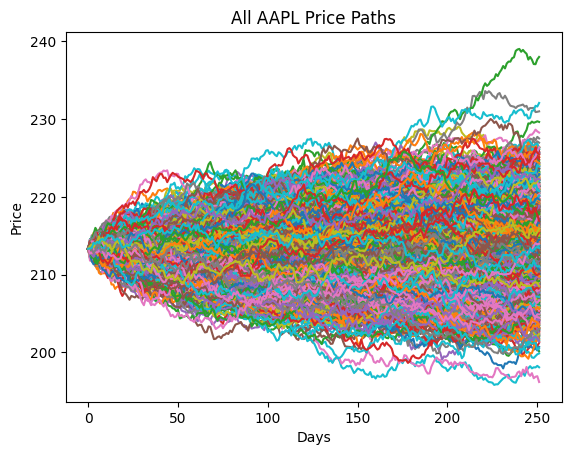

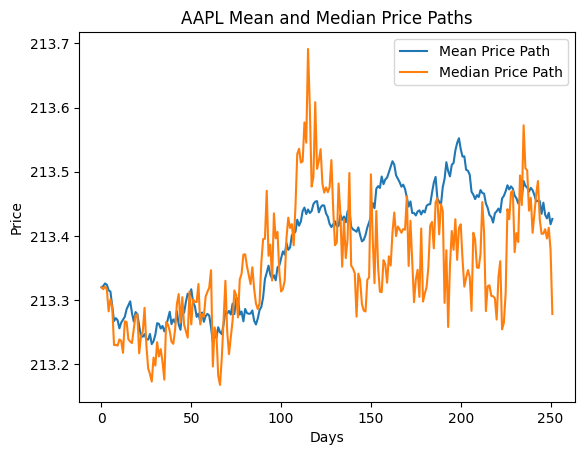

In [ ]:
data = yf.download('AAPL',period='max')
prices = np.array(data['Close'])

years = 1
ticker = 'AAPL'
log_return = log_returns(prices)
driftval = drift(log_return)
volatilityval = volatility(log_return)
num_simulations = 1000
price_paths = price_predict(driftval,volatilityval,prices,years,num_simulations)
plots(price_paths,ticker)
mean_path, median_path = mean_median_plot(price_paths,ticker)
profit(prices,mean_path,median_path)

[*********************100%***********************]  1 of 1 completed
<ipython-input-1-154ea13451fd>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  log_returns[i] = np.log(prices[i]/prices[i-1])


The final price according to the mean price is $215.41364904329993
The final price according to the median price is $213.71324161707503
The initial price of the stock is $[213.32000732]
Percent change according to the mean is [0.98145586]%
Percent change according to the median is [0.18434009]%
Profit according to the mean is $[2.09364172]
Profit according to the median is $[0.39323429]


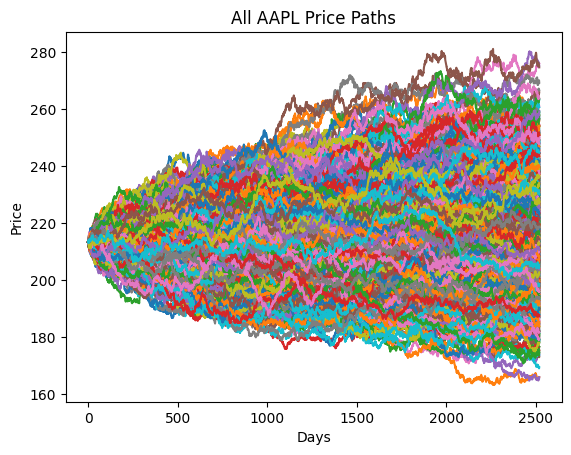

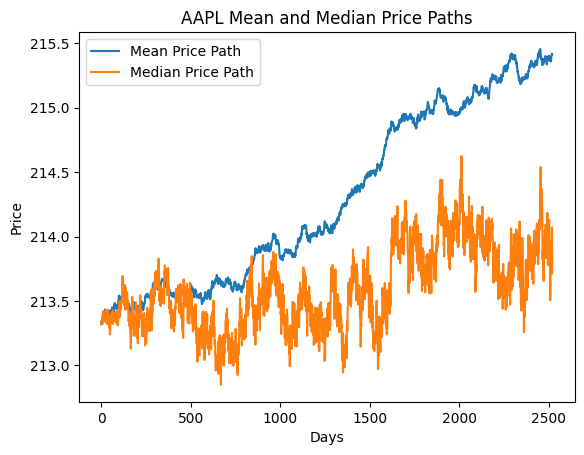

In [ ]:
data = yf.download('AAPL', period='max')
prices = np.array(data['Close'])

years = 10
ticker = 'AAPL'
log_return = log_returns(prices)
driftval = drift(log_return)
volatilityval = volatility(log_return)
num_simulations = 1000
price_paths = price_predict(driftval,volatilityval,prices,years,num_simulations)
plots(price_paths,ticker)
mean_path, median_path = mean_median_plot(price_paths,ticker)
profit(prices,mean_path,median_path)

[*********************100%***********************]  1 of 1 completed
<ipython-input-1-154ea13451fd>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  log_returns[i] = np.log(prices[i]/prices[i-1])


The final price according to the mean price is $215.04912916647626
The final price according to the median price is $214.5279490944091
The initial price of the stock is $[213.32000732]
Percent change according to the mean is [0.8105765]%
Percent change according to the median is [0.56625808]%
Profit according to the mean is $[1.72912184]
Profit according to the median is $[1.20794177]


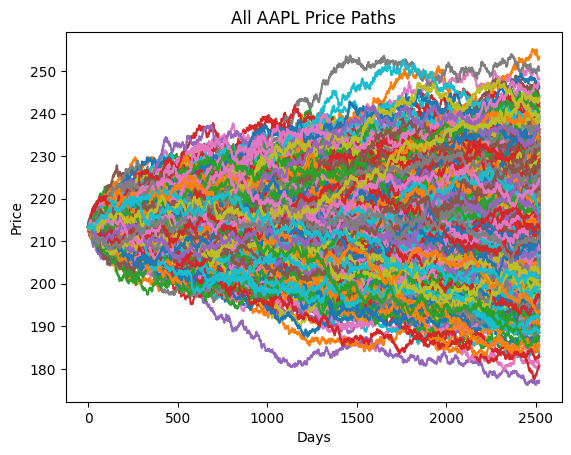

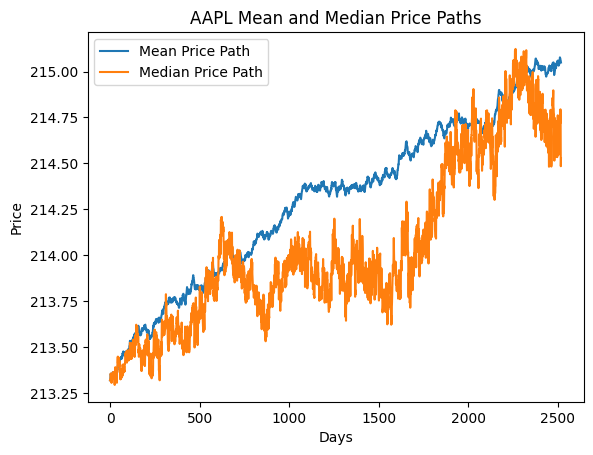

In [ ]:
data_years = 10
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=365*data_years)
data = yf.download('AAPL',start=start_date, end=end_date)
prices = np.array(data['Close'])
ticker = 'AAPL'
log_return = log_returns(prices)
driftval = drift(log_return)
volatilityval = volatility(log_return)
years = 10
num_simulations = 1000
price_paths = price_predict(driftval,volatilityval,prices,years,num_simulations)
plots(price_paths,ticker)
mean_path, median_path = mean_median_plot(price_paths,ticker)
profit(prices,mean_path,median_path)

In [ ]:
def jump_diffusion_predict(drift,volatility,prices,years,num_simulations,jump_prob=0.1,jump_size=0.01,jump_vol=0.05):
  s0 = prices[-1]
  dt = 1/252
  stepnum = int(years/dt)
  price_paths = np.zeros((stepnum,num_simulations))
  price_paths[0] = s0


  for i in range(1,stepnum):
    Z = np.random.standard_normal(num_simulations)
    jump_occurs = np.random.rand(num_simulations) < jump_prob*dt
    jump_sizes = np.random.normal(jump_size,jump_vol,num_simulations)
    price_paths[i] = price_paths[i-1]*np.exp((drift-0.5*volatility**2)*dt+volatility*np.sqrt(dt)*Z)*np.exp(jump_sizes*jump_occurs)

  return price_paths

[*********************100%***********************]  1 of 1 completed
<ipython-input-1-154ea13451fd>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  log_returns[i] = np.log(prices[i]/prices[i-1])


The final price according to the mean price is $223.30049481322865
The final price according to the median price is $219.66588839360708
The initial price of the stock is $[213.32000732]
Percent change according to the mean is [4.67864577]%
Percent change according to the median is [2.97481758]%
Profit according to the mean is $[9.98048749]
Profit according to the median is $[6.34588107]


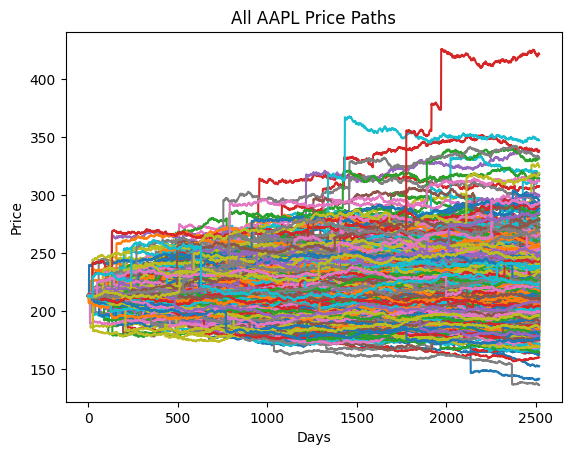

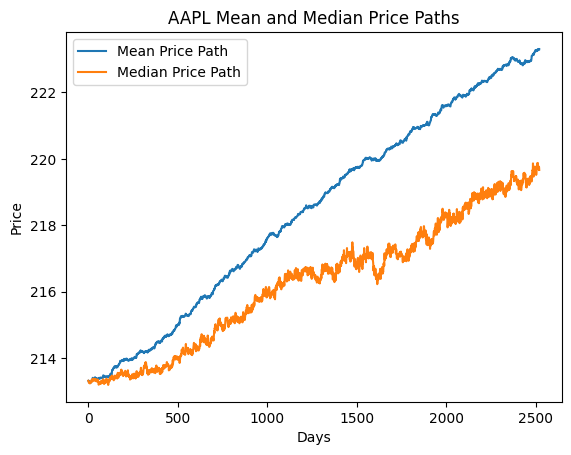

In [ ]:
data_years = 5
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=365*data_years)
data = yf.download('AAPL',start=start_date, end=end_date)
prices = np.array(data['Close'])
ticker = 'AAPL'
log_return = log_returns(prices)
driftval = drift(log_return)
volatilityval = volatility(log_return)
years = 10
num_simulations = 1000
price_paths = jump_diffusion_predict(driftval,volatilityval,prices,years,num_simulations,jump_prob=0.15,jump_size=0.02,jump_vol=0.08)
plots(price_paths,ticker)
mean_path, median_path = mean_median_plot(price_paths,ticker)
profit(prices,mean_path,median_path)